In [1]:
import random
def sum(fit_value):
    total = 0
    for i in range(len(fit_value)):
        total += fit_value[i]
    return total

In [2]:
# 累积概率计算
# =============================================================================
def cumsum(fit_value):
    t = 0
    for i in range(len(fit_value)):
        t = t + fit_value[i]
        fit_value[i] = t
    return fit_value

In [4]:
# 轮盘赌算法
# =============================================================================
def ga_selection(pop, fit_value):
    
    #计算累积概率
    newfit_value = []#存储每个个体的累积概率
    # 适应度总和
    total_fit = sum(fit_value)
    for i in range(len(fit_value)):
        #计算每个适应度占适应度总和的比例
        newfit_value.append(fit_value[i] / total_fit)
    # 计算累计概率
    cumsum(newfit_value)
    
    #生成随机数序列用于选择和比较
    ms = []#随机数序列
    pop_len = len(pop)
    for i in range(pop_len):
        ms.append(random.random())
    ms.sort()
        
    #轮盘赌选择法
    fitin = 0
    newin = 0
    newpop = pop
    while newin < pop_len:
        #选择--累积概率大于随机概率
        if(ms[newin] < newfit_value[fitin]):
            newpop[newin] = pop[fitin]
            newin = newin + 1
        #不选择--累积概率小于随机概率
        else:
            fitin = fitin + 1
    pop = newpop

In [5]:
if __name__ == '__main__':
    pop = ['a' ,'b', 'c', 'd', 'e']
    obj = [1 ,3, 0, 2, 4]
    #newfit_value = [0.1 , 0.4 , 0.4 , 0.6 , 1.0]
    ga_selection(pop, obj)
    print(pop)

['b', 'b', 'b', 'e', 'e']


In [6]:
from __future__ import division
import random
from bisect import bisect_left
import numpy as np
import timeit
import matplotlib.pyplot as plt 


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [7]:
def basic(fitness):
    '''
    Input: a list of N fitness values (list or tuple)
    Output: selected index
    '''
    sumFits = sum(fitness)
    # generate a random number
    rndPoint = random.uniform(0, sumFits)
    # calculate the index: O(N)
    accumulator = 0.0
    for ind, val in enumerate(fitness):
        accumulator += val
        if accumulator >= rndPoint:
            return ind


"""
Bisecting search roulette wheel selection: O(N + logN)
"""
def bisectSearch(fitness):
    '''
    Input: a list of N fitness values (list or tuple)
    Output: selected index
    '''
    sumFits = sum(fitness)
    # generate a random number
    rndPoint = random.uniform(0, sumFits)
    # calculate the accumulator: O(N)
    accumulator = []
    accsum = 0.0
    for fit in fitness:
        accsum += fit
        accumulator.append(accsum)
    return bisect_left(accumulator, rndPoint)   # O(logN)


"""
Stochastic Acceptance: O(1) if given the N and maxFit before
"""
def stochasticAccept(fitness):
    '''
    Input: a list of N fitness values (list or tuple)
    Output: selected index
    '''
    # calculate N and max fitness value
    N = len(fitness)
    maxFit = max(fitness)
    # select: O(1)
    while True:
        # randomly select an individual with uniform probability
        ind = int(N * random.random())
        # with probability wi/wmax to accept the selection
        if random.random() <= fitness[ind] / maxFit:
            return ind


"""
main function
"""
def main():
    # init number of fitness values
    N = [10, 10**2, 10**3, 10**4, 10**5]
    # calculate average total run time for each algorithm
    times = [[], [], []]
    algos = [basic, bisectSearch, stochasticAccept]
    for n in N:
        fitness = np.random.random((n,))
        for ind, algo in enumerate(algos):
            sample_times = []
            start = timeit.default_timer()
            for _ in range(100):
                algo(fitness)
                sample_times.append(timeit.default_timer() - start)
            times[ind].append(np.array(sample_times).mean())
    # plot the result
    lineStyle = ['b-o', 'g--p', 'r:*']
    algoName = ['basic', 'bisectSearch', 'stochasticAccept']
    for i in range(len(times)):
        plt.loglog(N, times[i], lineStyle[i], label=algoName[i])
    plt.legend(loc=2)
    plt.title('log-log plot of average running time')
    plt.xlabel('N')
    plt.ylabel('Average Running Time')
    plt.grid('on')
    plt.show() 

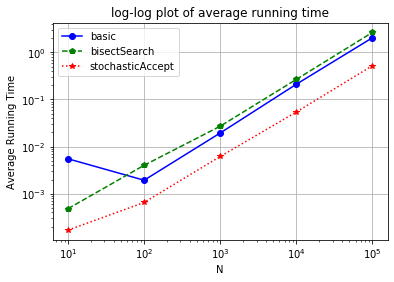

In [8]:
if __name__ == "__main__":
    main()